In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://ourworldindata.org/covid-vaccinations?country=RUS 
# download link https://covid.ourworldindata.org/data/owid-covid-data.csv

df = pd.read_csv('d:\\Downloads\owid-covid-data.csv', parse_dates = ['date'])

In [3]:
rus_df = df[df.location == 'Russia'][['date', 'new_cases', 'new_deaths', 
                                      'people_vaccinated', 'people_fully_vaccinated',
                                      'population']]

In [4]:
rus_df['percent_fully_vaccinated'] = 100 * rus_df.people_fully_vaccinated / rus_df.population
rus_df['percent_vaccinated'] = 100 * rus_df.people_vaccinated / rus_df.population
rus_df

,date,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated,population,percent_fully_vaccinated,percent_vaccinated
98458,2020-01-31,2.0,NaN,NaN,NaN,145912022.0,NaN,NaN
98459,2020-02-01,0.0,NaN,NaN,NaN,145912022.0,NaN,NaN
98460,2020-02-02,0.0,NaN,NaN,NaN,145912022.0,NaN,NaN
98461,2020-02-03,0.0,NaN,NaN,NaN,145912022.0,NaN,NaN
98462,2020-02-04,0.0,NaN,NaN,NaN,145912022.0,NaN,NaN
...,...,...,...,...,...,...,...,...
99105,2021-11-08,38257.0,1164.0,58101534.0,49639427.0,145912022.0,34.020108,39.819566
99106,2021-11-09,37999.0,1183.0,58720979.0,49936526.0,145912022.0,34.223723,40.244099
99107,2021-11-10,36896.0,1206.0,59009118.0,50121433.0,145912022.0,34.350448,40.441574
99108,2021-11-11,39584.0,1206.0,59543164.0,50430347.0,145912022.0,34.562160,40.807579


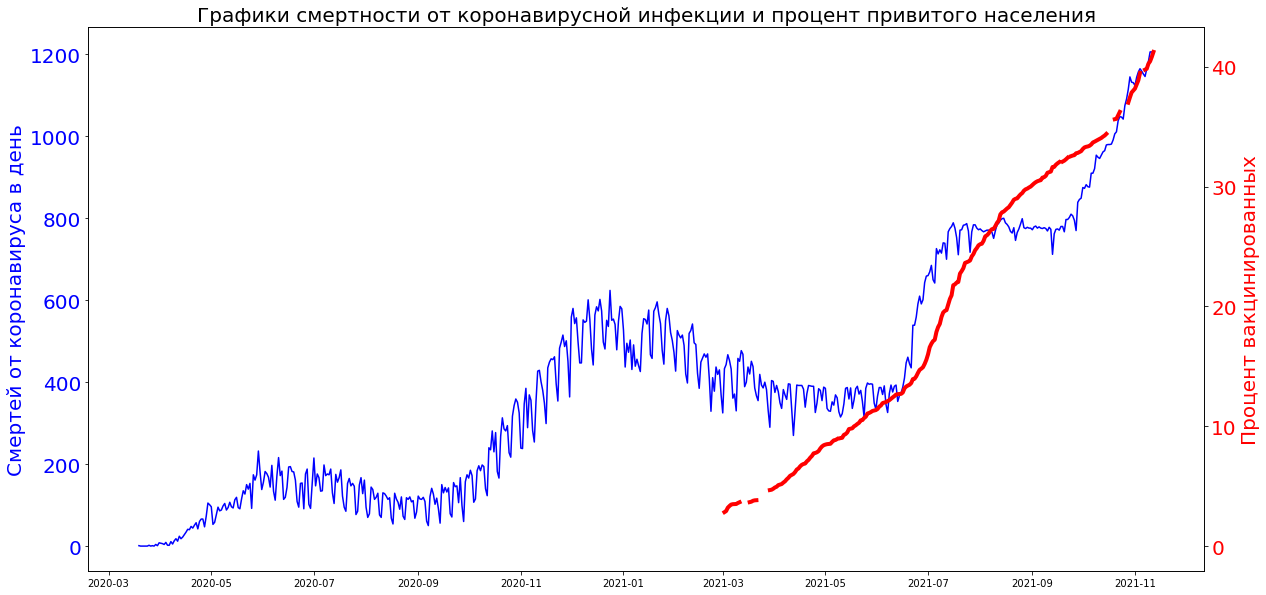

In [5]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(rus_df.date, rus_df.new_deaths, color='blue')
ax.set_ylabel('Смертей от коронавируса в день', color='blue', fontsize=20)
ax.tick_params(axis='y', labelcolor='blue', labelsize=20)
ax1 = ax.twinx()
ax1.plot(rus_df.date, rus_df.percent_vaccinated, label='percent_vaccinated', color='red', linewidth=4)
ax1.set_ylabel('Процент вакцинированных', color='red', fontsize=20)
ax1.tick_params(axis='y', labelcolor='red', labelsize=20)

ax1.set_title('Графики смертности от коронавирусной инфекции и процент привитого населения', fontsize=20)
plt.show()

In [6]:
# С ростом процента вакцинированных растет и число смертельных исходов.

In [7]:
rus_df.drop(['population', 'percent_fully_vaccinated', 'percent_vaccinated'], axis=1).corr()

,new_cases,new_deaths,people_vaccinated,people_fully_vaccinated
new_cases,1.000000,0.870140,0.806767,0.823250
new_deaths,0.870140,1.000000,0.933005,0.919317
people_vaccinated,0.806767,0.933005,1.000000,0.990075
people_fully_vaccinated,0.823250,0.919317,0.990075,1.000000


In [8]:
# Корреляция по Пирсону между общим количеством вакцинированных и новыми смертями = 0,933005
# Для полностью вакцинированных чуть меньше = 0,919317